In [2]:
import numpy as np
from keras.datasets import imdb
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

In [4]:
train_labels[0]

1

In [5]:
# step 1: load the dictionary mappings from word to integer index
word_index = imdb.get_word_index()
 # step 2: reverse word index to map integer indexes to their respective words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
 # Step 3: decode the review, mapping integer indices to words
 #
 # indices are off by 3 because 0, 1, and 2 are reserverd indices for "padding", "Start of se
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [6]:
len(reverse_word_index)

88584

In [7]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))    
    for i,sequence in enumerate(sequences):
        results[i,sequence] = 1                        
    return results
# Vectorize training Data
X_train = vectorize_sequences(train_data)
# Creates an all zero matrix of shape
# Sets specific indices of results[i]
# Vectorize testing Data
X_test = vectorize_sequences(test_data)

In [8]:

 X_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [9]:
X_train.shape

(25000, 10000)

In [10]:
y_train = np.asarray(train_labels).astype('float32')
y_test  = np.asarray(test_labels).astype('float32')

In [11]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [12]:
 model.compile(
 optimizer=optimizers.RMSprop(learning_rate=0.001),
 loss = losses.binary_crossentropy,
 metrics = [metrics.binary_accuracy]
 )

In [13]:
 # Input for Validation
X_val = X_train[:10000]
partial_X_train = X_train[10000:]
# Labels for validation
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [14]:
history = model.fit(
partial_X_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(X_val, y_val)
)

Epoch 1/20
30/30 [==============================] - 10s 265ms/step - loss: 0.5485 - binary_accuracy: 0.7675 - val_loss: 0.4309 - val_binary_accuracy: 0.8458
Epoch 2/20
30/30 [==============================] - 1s 45ms/step - loss: 0.3530 - binary_accuracy: 0.8917 - val_loss: 0.3455 - val_binary_accuracy: 0.8642
Epoch 3/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2664 - binary_accuracy: 0.9120 - val_loss: 0.2996 - val_binary_accuracy: 0.8843
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2156 - binary_accuracy: 0.9300 - val_loss: 0.2840 - val_binary_accuracy: 0.8856
Epoch 5/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1821 - binary_accuracy: 0.9419 - val_loss: 0.2897 - val_binary_accuracy: 0.8850
Epoch 6/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1583 - binary_accuracy: 0.9465 - val_loss: 0.2814 - val_binary_accuracy: 0.8848
Epoch 7/20
30/30 [==============================] - 1s 32ms/step - l

In [15]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

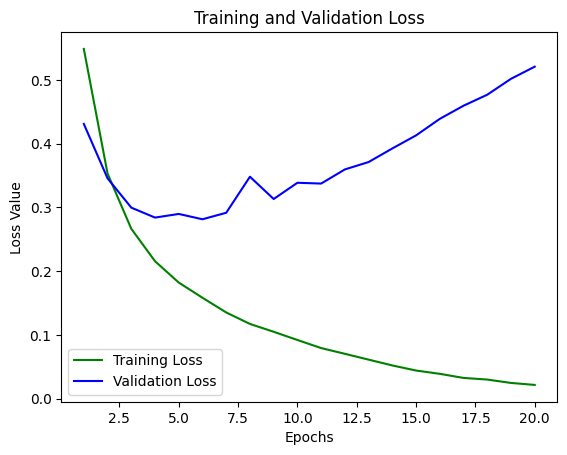

In [16]:
# Plotting losses
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'g', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()
plt.show()

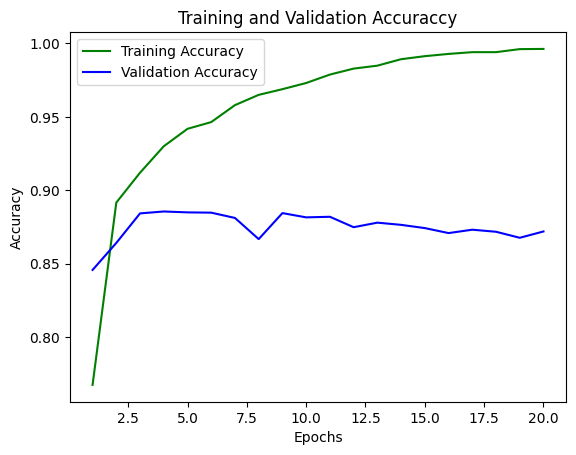

In [17]:
# Training and Validation Accuracy
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, acc_values, 'g', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'b', label="Validation Accuracy")
plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [18]:
 model.fit(
    partial_X_train,
    partial_y_train,
    epochs=3,
    batch_size=512,
    validation_data=(X_val, y_val)
 )

Epoch 1/3
30/30 [==============================] - 8s 260ms/step - loss: 0.0195 - binary_accuracy: 0.9973 - val_loss: 0.5391 - val_binary_accuracy: 0.8695
Epoch 2/3
30/30 [==============================] - 1s 41ms/step - loss: 0.0159 - binary_accuracy: 0.9985 - val_loss: 0.5867 - val_binary_accuracy: 0.8687
Epoch 3/3
30/30 [==============================] - 1s 29ms/step - loss: 0.0134 - binary_accuracy: 0.9990 - val_loss: 0.5900 - val_binary_accuracy: 0.8694


In [21]:
 # Making Predictions for testing data
np.set_printoptions(suppress=True)
result = model.predict(X_val)
result

313/313 [==============================] - 3s 5ms/step


array([[0.9999992 ],
       [0.00012627],
       [0.00013587],
       ...,
       [0.9999976 ],
       [0.00098564],
       [0.0017618 ]], dtype=float32)

In [23]:
y_pred = np.zeros(len(result))
for i, score in enumerate(result):
    y_pred[i] = np.round(score)

In [25]:
mae = metrics.mean_absolute_error(y_pred, y_val)
mae

<tf.Tensor: shape=(), dtype=float32, numpy=0.1306>